In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
import tensorflow as tf
import random
import os
import time
from tensorflow.keras.models import load_model
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error,  mean_squared_error
from tensorflow.keras.utils import plot_model

def reset_random_seeds():
   os.environ['PYTHONHASHSEED']=str(2)
   tf.random.set_seed(2)
   np.random.seed(2)
   random.seed(2)

reset_random_seeds()

# Import Data

In [2]:
saham = pd.read_csv('Data\LQ45.csv')
saham = saham[['Close']].dropna().reset_index(drop=True)

trend = pd.read_csv('Data/adjust(4).csv')
trend = trend.iloc[:,2:]
combined_data = pd.concat([saham,trend],axis=1)


# Persiapan Data

## Scaling data

In [3]:
scaler = MinMaxScaler(feature_range=(0,1))
_scaler = MinMaxScaler(feature_range=(0,1))

In [4]:
scaler_combined = _scaler.fit(combined_data)
scaler_saham = scaler.fit(saham)

In [5]:
combined_scaled = scaler_combined.transform(combined_data)
saham_scaled  = scaler_saham.transform(saham)

## Split data train-test

In [6]:
bagi  = int(0.7*len(saham["Close"]))

In [7]:
saham_train, saham_test = saham_scaled[:bagi], saham_scaled[bagi:]
combined_train, combined_test = combined_scaled[:bagi], combined_scaled[bagi:]

## Fungsi Buat Sequence

In [8]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequence = data[i: (i + sequence_length)]
        label = data[i + sequence_length][0]
        sequences.append(sequence)
        labels.append(label)
    return np.array(sequences), np.array(labels)

In [9]:
x_saham_train, y_saham_train = create_sequences(saham_train, 7)
x_combined_train, y_combined_train = create_sequences(combined_train, 7)

x_saham_test, y_saham_test = create_sequences(saham_test,7)
x_combined_test, y_combined_test = create_sequences(combined_test,7)

# MODEL

In [ ]:
model_saham = Sequential([
    tf.keras.layers.Input(x_saham_train.shape[1:]),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1)
    ])

model_combined = Sequential([
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1)
    ])

model_saham.compile(optimizer='Adam',loss="mean_squared_error")
model_combined.compile(optimizer='Adam',loss="mean_squared_error")


## Training model SAHAM

In [11]:
history_saham = model_saham.fit(x_saham_train, y_saham_train, epochs=1000,
                           batch_size=32, validation_data=(x_saham_test, y_saham_test),verbose=0)

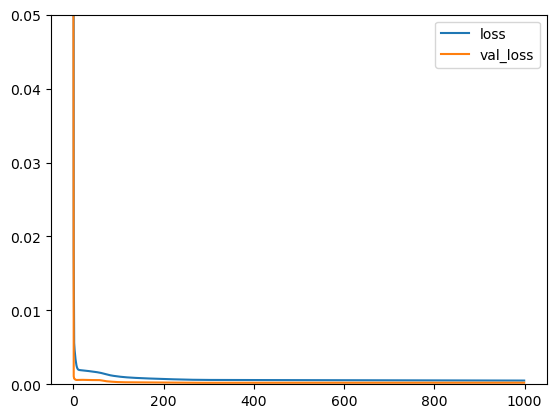

In [12]:
plt.plot(history_saham.history['loss'],label="loss")
plt.plot(history_saham.history['val_loss'],label="val_loss")
plt.ylim(0,0.05)
plt.legend()
plt.savefig("loss_saham")
plt.show()

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


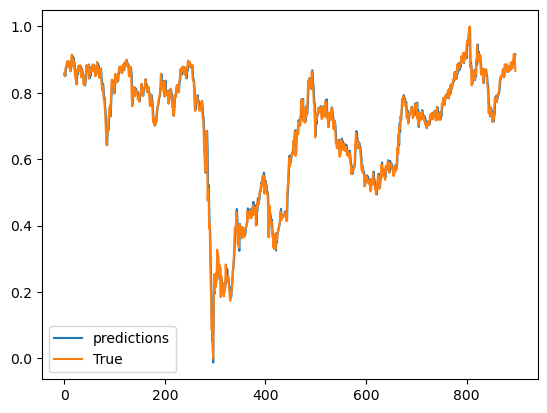

MAPE :  0.009341616497528826
MSE :  129.7158125191655


In [13]:
predictions = model_saham.predict(x_saham_train)

# Plot hasil prediksi vs nilai aktual
plt.plot(predictions, label = "predictions")
plt.plot(y_saham_train, label="True")
plt.legend()
plt.savefig("training_saham")
plt.show()


predictions = scaler_saham.inverse_transform(predictions)
true = scaler_saham.inverse_transform(y_saham_train.reshape(-1, 1))
print("MAPE : ",mean_absolute_percentage_error(true, predictions))
print("MSE : ", mean_squared_error(true, predictions))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


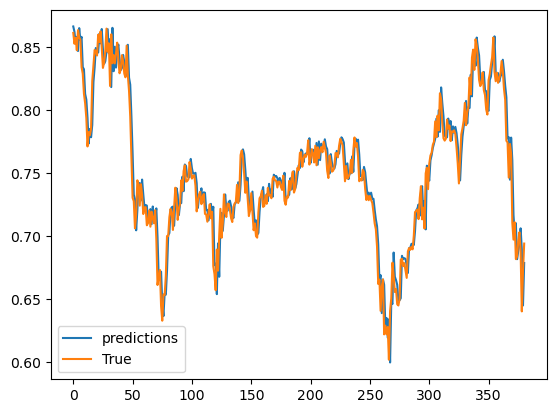

MAPE :  0.006006923480819406
MSE :  56.780008066818084


In [14]:
predictions = model_saham.predict(x_saham_test)

# Plot hasil prediksi vs nilai aktual
plt.plot(predictions, label = "predictions")
plt.plot(y_saham_test, label="True")
plt.legend()
plt.savefig("testing_saham")
plt.show()


predictions = scaler_saham.inverse_transform(predictions)
true = scaler_saham.inverse_transform(y_saham_test.reshape(-1, 1))
print("MAPE : ",mean_absolute_percentage_error(true, predictions))
print("MSE : ", mean_squared_error(true, predictions))

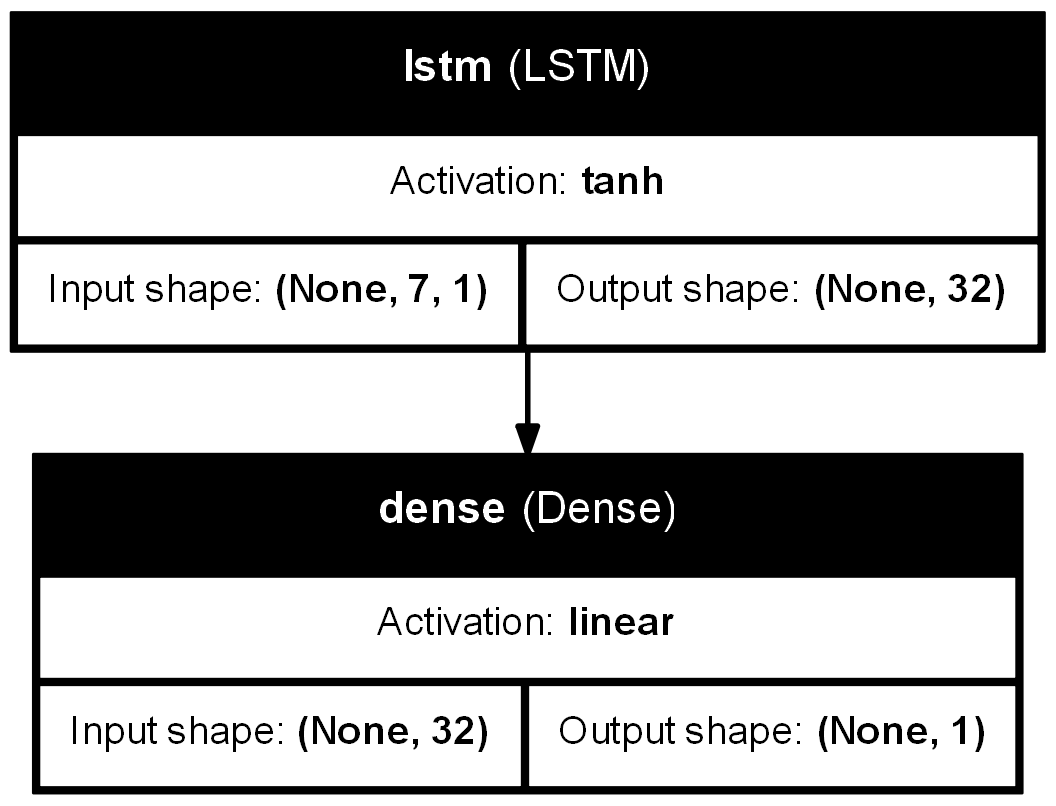

In [15]:
tf.keras.utils.plot_model(
    model_saham,
    to_file='model_saham.png',
    show_shapes=True,
    show_layer_names=True,
    # rankdir='TB',
    expand_nested=True,
    dpi=200,
    show_layer_activations=True,
)

## Train model combined train

In [16]:
history_combined = model_combined.fit(x_combined_train, y_combined_train, epochs=1000,
                           batch_size=32, validation_data=(x_combined_test, y_combined_test),verbose=0)

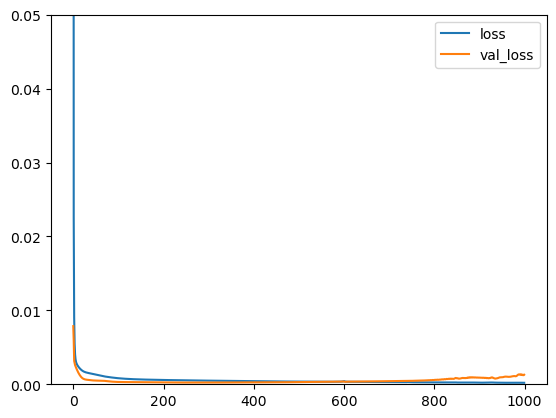

In [17]:
plt.plot(history_combined.history['loss'],label="loss")
plt.plot(history_combined.history['val_loss'],label="val_loss")
plt.ylim(0,0.05)
plt.legend()
plt.savefig("loss_combined")
plt.show()

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


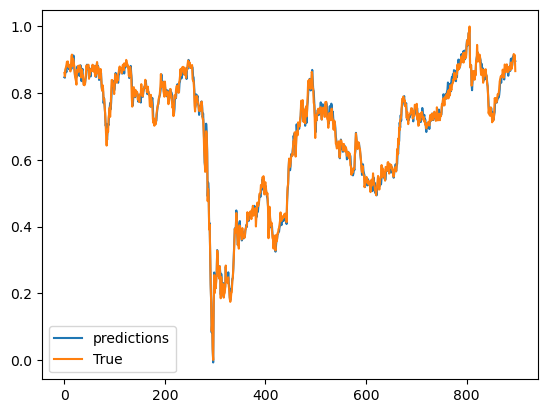

MAPE :  0.006009512220329735
MSE :  55.56910952043162


In [18]:
predictions = model_combined.predict(x_combined_train)

# Plot hasil prediksi vs nilai aktual
plt.plot(predictions, label = "predictions")
plt.plot(y_combined_train, label="True")
plt.legend()
plt.savefig("training_combined")
plt.show()


predictions = scaler_saham.inverse_transform(predictions)
true = scaler_saham.inverse_transform(y_combined_train.reshape(-1, 1))
print("MAPE : ",mean_absolute_percentage_error(true, predictions))
print("MSE : ", mean_squared_error(true, predictions))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


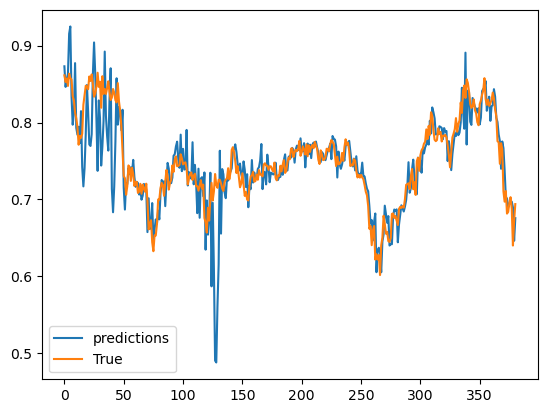

MAPE :  0.01161480122141869
MSE :  346.38513835781976


In [19]:
predictions = model_combined.predict(x_combined_test)

# Plot hasil prediksi vs nilai aktual
plt.plot(predictions, label = "predictions")
plt.plot(y_combined_test, label="True")
plt.legend()
plt.savefig("testing_combined")
plt.show()


predictions = scaler_saham.inverse_transform(predictions)
true = scaler_saham.inverse_transform(y_combined_test.reshape(-1, 1))
print("MAPE : ",mean_absolute_percentage_error(true, predictions))
print("MSE : ", mean_squared_error(true, predictions))

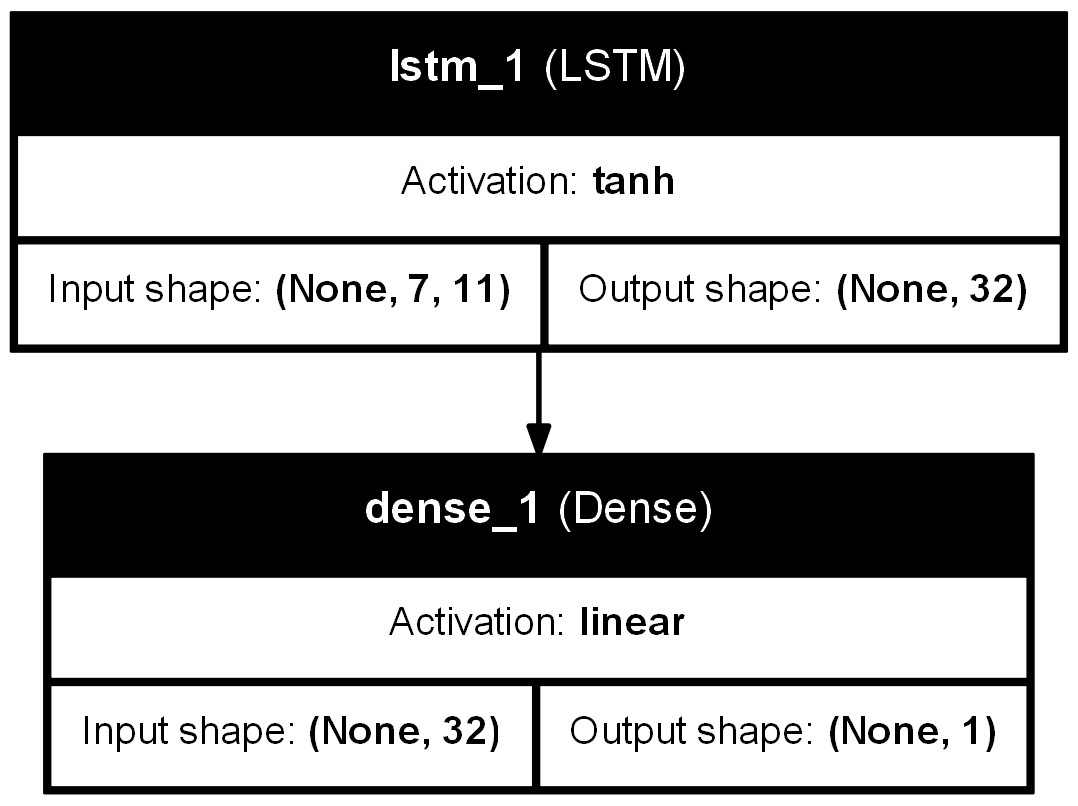

In [20]:
tf.keras.utils.plot_model(
    model_combined,
    to_file='model_combined.png',
    show_shapes=True,
    show_layer_names=True,
    # rankdir='TB',
    expand_nested=True,
    dpi=200,
    show_layer_activations=True,
)